<h1>Querying for Events and Event-Specific Measurements</h1>

First we will need to create a connection object.  This has been covered in a previous notebook. <br>

In [1]:
import getpass
import emspy
from emspy import Connection
import numpy as np

In [2]:
#-- Original --#
# user_name = input('Enter Username:')
# pwd = getpass.getpass('Enter Password:')
#--------------#

user_name = 'jeffrey.okogbaa'
pwd = 'Footballsd8973!'

In [3]:
server_url = 'https://oae-api.us.efoqa.com/api'

In [4]:
c = Connection(user=user_name, pwd=pwd, server_url=server_url)

<h1>Example: Query High Rate of Descent Events and graph some relevant measurements</h1>
<ol>
    <li>Create an Event Query with filter for Event Type == 'High Rate of Descent on Final Approach' and return 'ROD at Max Exceedance', 'HAT at Max exceedance', and 'Severity'.</li>
    <li>Create a scatter plot of 'ROD at max Exceedance' vs 'HAT at Max Exceedance' and color the dots by severity.</li>
</ol>

<h2>Step 1: Import FltQuery Class</h2>
To create a database query, we will need first import the `FltQuery` class. The Class is slighly misnamed since it is used for all dtabase queries and not just flights.

In [5]:
from emspy.query import FltQuery

<h2>Step 2: Create object</h2>
Create a query object by passing in a valid <i>connection</i> object, the system to connect to, and a .db file to store metadata.

In [6]:
query = FltQuery(c, 1, 'queryDatabase_event.db')

On <root>(root)...


C:\Users\MROJKO\Anaconda3\lib\site-packages\emspy\query\flight.py:366: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._trees[treetype].append([x for x in d2 if x['id'] in add_id])


=== Starting to update subtree from 'FDW (database_group)' ===
On FDW(database_group)...


C:\Users\MROJKO\Anaconda3\lib\site-packages\emspy\query\flight.py:278: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._trees[treetype] = self._trees[treetype].append(d1, ignore_index=True)
C:\Users\MROJKO\Anaconda3\lib\site-packages\emspy\query\flight.py:286: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._trees[treetype] = self._trees[treetype].append(x, ignore_index=True)
C:\Users\MROJKO\Anaconda3\lib\site-packages\emspy\query\flight.py:286: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._trees[treetype] = self._trees[treetype].append(x, ignore_index=True)
C:\Users\MROJKO\Anaconda3\lib\site-packages\emspy\query\flight.py:286: FutureWarning: The frame.append method is deprecated and will be removed from pandas 

-- Added 3 databases
On Dimensions(database_group)...
-- Added 20 databases


C:\Users\MROJKO\Anaconda3\lib\site-packages\emspy\query\flight.py:278: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._trees[treetype] = self._trees[treetype].append(d1, ignore_index=True)


<h2>Step 3: Set Database</h2>
Now that we have a <b>FltQuery</b> object, we need to set the database we want to query.  For most purposes, this will either be the FDW Flights database, or a specific Event database.<br>
In this case, the database we want is the <b>High Rate of Descent on Final Approach</b> database in the the <b>Flight Safety Events</b> profile (shown in the picture below).<br>
The database we are interested in is nested inside some folders, so before we can set the database to query, we will need to "discover" it by loading the folder that it is in. We do this using the update_dbtree() method. In this case, we want to dicover the path of the profile that contains the event we want.<br>
<img src="notebook_images/Event_Query_database.png">

In [7]:
query.update_dbtree('FDW', 'APM Events', 'Standard Library Profiles', 'Safety', 'P1: Library Flight Safety Events')

On FDW(database_group)...


C:\Users\MROJKO\Anaconda3\lib\site-packages\emspy\query\flight.py:347: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._trees[treetype] = self._trees[treetype].append(d1, ignore_index=True)


-- Added 3 databases
On APM Events(database_group)...


C:\Users\MROJKO\Anaconda3\lib\site-packages\emspy\query\flight.py:366: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._trees[treetype].append([x for x in d2 if x['id'] in add_id])


On Standard Library Profiles(database_group)...


C:\Users\MROJKO\Anaconda3\lib\site-packages\emspy\query\flight.py:366: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._trees[treetype].append([x for x in d2 if x['id'] in add_id])


On Safety(database_group)...


C:\Users\MROJKO\Anaconda3\lib\site-packages\emspy\query\flight.py:366: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._trees[treetype].append([x for x in d2 if x['id'] in add_id])


=== Starting to update subtree from 'P1: Library Flight Safety Events (database_group)' ===
On P1: Library Flight Safety Events(database_group)...
-- Added 222 databases


C:\Users\MROJKO\Anaconda3\lib\site-packages\emspy\query\flight.py:278: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._trees[treetype] = self._trees[treetype].append(d1, ignore_index=True)


Now, <font face='courier'>query</font> knows something about databases in the tree.  So in the following field, we select the database we want to use for our queries. 

In [8]:
query.set_database('High Rate of Descent on Final Approach')

On High Rate of Descent on Final Approach(database)...
Using database 'High Rate of Descent on Final Approach'.


C:\Users\MROJKO\Anaconda3\lib\site-packages\emspy\query\flight.py:366: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._trees[treetype].append([x for x in d2 if x['id'] in add_id])


<h2>Step 4: Discover fields</h2>
Now that we have set the database, we need to repeat the discovery phase but this time to find the fileds that we want to select and filter on. This is done using the update_fieldtree() method.<br>
For this example, since we selected an single event as the databse, we will also have acces to the profile measurements as well as the event specific measrurements for the selected event.
<img src="notebook_images/Event_Query_fields.png"> 

In [9]:
query.update_fieldtree('Flight Information', exclude_tree=['Processing', 'Date Times'])
query.update_fieldtree("Profile 1: 'High Rate of Descent on Final Approach' Measurements")

=== Starting to update subtree from 'Flight Information (field_group)' ===
On Flight Information(field_group)...


C:\Users\MROJKO\Anaconda3\lib\site-packages\emspy\query\flight.py:278: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._trees[treetype] = self._trees[treetype].append(d1, ignore_index=True)
C:\Users\MROJKO\Anaconda3\lib\site-packages\emspy\query\flight.py:286: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._trees[treetype] = self._trees[treetype].append(x, ignore_index=True)
C:\Users\MROJKO\Anaconda3\lib\site-packages\emspy\query\flight.py:286: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._trees[treetype] = self._trees[treetype].append(x, ignore_index=True)


-- Added 6 fields
=== Starting to update subtree from 'Profile 1: 'High Rate of Descent on Final Approach' Measurements (field_group)' ===
On Profile 1: 'High Rate of Descent on Final Approach' Measurements(field_group)...


C:\Users\MROJKO\Anaconda3\lib\site-packages\emspy\query\flight.py:286: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._trees[treetype] = self._trees[treetype].append(x, ignore_index=True)


On Measurements(field_group)...
-- Added 9 fields


C:\Users\MROJKO\Anaconda3\lib\site-packages\emspy\query\flight.py:278: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._trees[treetype] = self._trees[treetype].append(d1, ignore_index=True)


Optional, save the metadata file so it can be used in later queries

In [10]:
query.save_metadata('test2.db')

<h2>Step 5: Select Fields</h2>
We are ready to tell our query which fileds we want. we do this using the select() method. The fields that are selected will be the columns that are returned by the query.

In [11]:
query.reset() # Clearing the query just in case
query.select('Flight Record',
             'P1: Max Exceedance of Rate of Descent Limit on 1st Approach (%)',
             'P1: GPWS (alert if > 0.5) around time of Event')

C:\Users\MROJKO\Anaconda3\lib\site-packages\emspy\query\flight.py:525: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(fres, ignore_index=True)


<h2>Step 6: Set Filters and other options</h2>
We do not need this for this example, but this is the part where you would add filters, aggregation, and sorting.

<h2>Step 7: Run the Query</h2>
We are ready to run the query. We do this using the run() method. This returns a pandas dataFrame

In [12]:
df = query.run()

Sending and opening an async-query to EMS ... Done.
 === Async call: 1 ===
Raw JSON output to Pandas dataframe...
Done.
Received up to 1071 rows.
Done.


In [13]:
df.head(5)

,Flight Record,P1: Max Exceedance of Rate of Descent Limit on 1st Approach (%),P1: GPWS (alert if > 0.5) around time of Event
0,56130,4.909819,0.0
1,56328,30.905516,1.0
2,56509,10.181508,1.0
3,56654,0.987042,NaN
4,57098,3.615143,0.0


<h2>Step 8: Data Manipulation and Graphing</h2>
We now have the results in a dataframe, so we can use built-in data manipulation and graphing methods
<img src="notebook_images/mpl.jpg">

In [14]:
value_column = 'P1: Max Exceedance of Rate of Descent Limit on 1st Approach (%)'
group_column = 'P1: GPWS (alert if > 0.5) around time of Event'

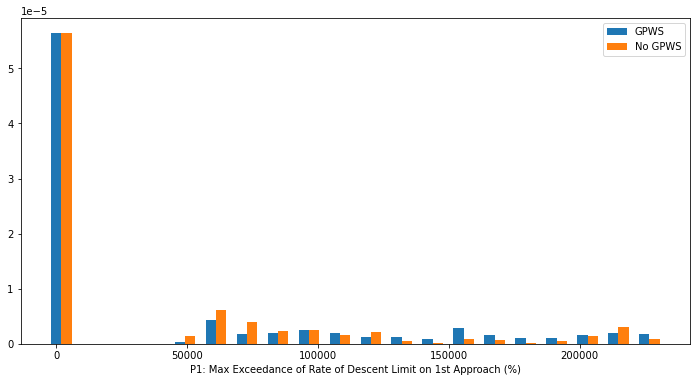

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,6))

zero = df.loc[df[group_column] == 0]
one = df.loc[df[group_column] == 1]

a_heights, a_bins = np.histogram(zero, bins=20, density=True)
b_heights, b_bins = np.histogram(one, bins=a_bins, density=True)

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width=width, label='GPWS')
ax.bar(b_bins[:-1]+width, b_heights, width=width, label='No GPWS')

ax.set_xlabel(value_column)
plt.legend()